**Build a classification model which will recognise the activities through the mobile sensor like walking, walking_upstairs  ,walking_downstairs ,sitting  ,standing,lying.The topic Human Activity recognition is in research and has its own advantages like anomaly detection, for healthy diet maintenance fitness bands are used , measuring stress level ,for monitoring employees ,for heartbeat pulse rate etc. In this project we are going to focus on  the dataset which was carried out through experiments with a group of 30 volunteers wearing a smartphone.The experiments have been video-recorded to label the data manually.The  main motto is to use the dataset and work with the libraries like scikit learn and machine learning related libraries and algorithms while training.**

## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("human_activity.csv")
df.columns



Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

# EDA and Basic Data Preprocessing and Preparation [Marks:2]

In [3]:
#Check top 5 records
df.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


# We can see we have 563 columns .The subject column is not going to be useful, so i will drop it from data 

In [4]:
df.drop('subject', axis =1, inplace=True)

In [5]:
df.shape

(7352, 562)

# After Droping the Subject Columns, we have 562 features now.

In [6]:
df.dtypes.value_counts()

float64    561
object       1
dtype: int64

# from data type we can see 561 features have fload value and 1 feature is object

In [7]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


# we see that the min = -1 and the max = +1. so no need for scaling

In [8]:
df.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

They have the same data types. That is, mostly floats and one object feature. Lets see what the object feature is from the rest

In [9]:
object_feature = df.dtypes == np.object
object_feature = df.columns[object_feature]
object_feature

Index(['Activity'], dtype='object')

As we can see, the only object data type in the dataset is the Activity feature. Lets take a closer look at it...

In [10]:
df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [11]:
# From Above we can see we have different kind of Activity like laying, standing, sitting, walking, walking upstairs, walking downstairs

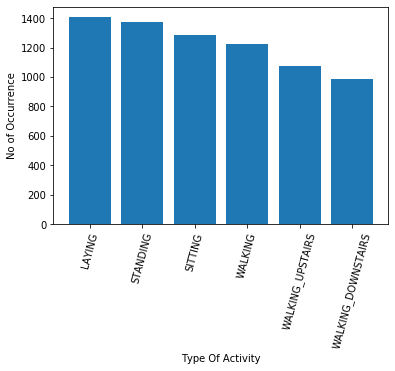

In [12]:
temp=df['Activity'].value_counts()

dta = pd.DataFrame({'Type': temp.index,
                   'Occurrence': temp.values
                  })

plt.bar(dta['Type'],dta['Occurrence'])
plt.xticks(rotation=75)
plt.xlabel('Type Of Activity')
plt.ylabel('No of Occurrence')
plt.show()

# From above we can see number of occurence for each Activity, It seems people prefer to laying most of the time

# Lets see Activity in percentage

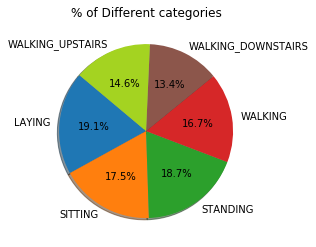

In [13]:
activity = df['Activity'].groupby(df['Activity']).count().index
activity_data = df['Activity'].groupby(df['Activity']).count().values
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#a4d321"]
plt.pie(activity_data, labels=activity,  colors=colors , autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Different categories")
plt.show()

# We need to encode the Activity column because sklearn won't accept sparse matrix as prediction columns . We will use LabelEncoder to encode the Activities

In [14]:
le = LabelEncoder()
for x in [df]:
    x['Activity'] = le.fit_transform(x.Activity)

In [15]:
df.Activity.sample(5)

4798    3
6542    0
5973    0
6028    5
5334    1
Name: Activity, dtype: int32

In [16]:
# Now All activity is encoded from 0 to 5

## Null/Outlier Treatment

In [17]:
# checking column wise null values
df.isnull().values.any()

False

# There are no null values in datasets

# Outlairs

In [18]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    print('Total Number of ouliers is',df1.shape[0]+df2.shape[0])
    
    #out_iqr(df_new,'tBodyAcc-min()-X')
    

In [19]:
out_iqr(df,df.columns)

The IQR is 0.8831297
The lower bound value is -2.313187115
The upper bound value is 1.219331685
Total Number of ouliers is 14704


# Remove the outliers

# Number of oultlier is very high, it seems this is not outliers, I am not removing any outliers now ,first I will see model with outlier and if we dont get good model then we will remove the oulairs and create modle again.

# Check for Duplicates 

In [20]:
print('Number of duplicates : ',sum(df.duplicated()))

Number of duplicates :  0


# From above it seems there is no duplicates

# Remove non-Important Features

## Lets use variance threshold from sklearn
Variance threshold from sklearn is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples

In [21]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(df) 
sum(sel.get_support())

562

In [22]:
# print the constant features
print(
    len([
        x for x in df.columns
        if x not in df.columns[sel.get_support()]
    ]))

[x for x in df.columns if x not in df.columns[sel.get_support()]]

0


[]

# We can see that all features meeting the variance threshold. So no need to remove any feature now.  We will try to build a base model to see how the current dataset performs with different classification algorithms. If the accuracy score is low, we will remove un-important features by using feature selection techniques to improve the model

## Split Predictor and Target Varaibles

In [23]:
X=pd.DataFrame(df.drop(['Activity'],axis=1))
y=df['Activity']

## Split Training and Testing Data Set

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5881, 561), (1471, 561), (5881,), (1471,))

## Standardize the Variables

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


#Same ratio of classes in both the train and validation data 

# Train Model using different variations of NB and Logistic Regression , We will use Logistic Regressoin then various Naive Bayes Algo,  First i am just creating Modle, then get the Time , accuracy of modle, accuracy of training and test data set together

# Choosing a model -Logistic Regression

In [26]:
from datetime import datetime
train_start_time = datetime.now()
lr = LogisticRegression()

# Training the Logistic Regression Modle

In [27]:
lr = lr.fit(X_train, y_train)
train_end_time = datetime.now()

# In above 2 cells I have used datetime.now() function to get the execution time of the model

# Evaluating the model

In [28]:
y_pred_lr = lr.predict(X_test)

# Naive Base - GaussianNB

In [29]:
from sklearn.model_selection import train_test_split
X_train_naive,X_test_naive,y_train_naive,y_test_naive=train_test_split(X,y,test_size=0.20,random_state=100)
X_train_naive.shape, X_test_naive.shape, y_train_naive.shape, y_test_naive.shape

((5881, 561), (1471, 561), (5881,), (1471,))

In [30]:
train_start_time_naive = datetime.now()
#Create a Gaussian Classifier
naive_gaussian = GaussianNB()

# Train the model using the training sets 
naive_gaussian.fit(X_train_naive, y_train_naive)
y_pred_naive_gaussian = naive_gaussian.predict(X_test_naive)
train_end_time_naive = datetime.now()

# Multinomial Naive Bayes

In [31]:
#MultiNomial Doest not works on negataive number so, we need to normalize it beofre using it
def NormalizeData(df):
    return (df - np.min(df)) / (np.max(df) - np.min(df))
scaled_x = NormalizeData(df)

In [32]:
X=pd.DataFrame(scaled_x.drop(['Activity'],axis=1))
y=df['Activity']

In [33]:
from sklearn.model_selection import train_test_split
X_train_naive_mb,X_test_naive_mb,y_train_naive_mb,y_test_naive_mb=train_test_split(X,y,test_size=0.20,random_state=100)
X_train_naive_mb.shape, X_test_naive_mb.shape, y_train_naive_mb.shape, y_test_naive_mb.shape

((5881, 561), (1471, 561), (5881,), (1471,))

In [34]:
train_start_time_naive_mb = datetime.now()
#Create a Gaussian Classifier
from sklearn.naive_bayes import MultinomialNB
naive_mb = MultinomialNB()

# Train the model using the training sets 
naive_mb.fit(X_train_naive_mb, y_train_naive_mb)
y_pred_naive_mb = naive_mb.predict(X_test_naive_mb)
train_end_time_naive_mb = datetime.now()

# Bernouli Naive Bayes

In [35]:
from sklearn.model_selection import train_test_split
X_train_naive_bernouli,X_test_naive_bernouli,y_train_naive_bernouli,y_test_naive_bernouli=train_test_split(X,y,test_size=0.20,random_state=100)
X_train_naive_bernouli.shape, X_test_naive_bernouli.shape, y_train_naive_bernouli.shape, y_test_naive_bernouli.shape

((5881, 561), (1471, 561), (5881,), (1471,))

In [36]:
train_start_time_naive_bernouli = datetime.now()
#Create a Gaussian Classifier
from sklearn.naive_bayes import BernoulliNB
naive_bernouli = BernoulliNB()

# Train the model using the training sets 
naive_bernouli.fit(X_train_naive_bernouli, y_train_naive_bernouli)
y_pred_naive_bernouli = naive_bernouli.predict(X_test_naive_bernouli)
train_end_time_naive_bernouli = datetime.now()

# ComplementNB Naive Bayes

In [37]:
from sklearn.model_selection import train_test_split
X_train_naive_complementnb,X_test_naive_complementnb,y_train_naive_complementnb,y_test_naive_complementnb=train_test_split(X,y,test_size=0.20,random_state=100)
X_train_naive_complementnb.shape, X_test_naive_complementnb.shape, y_train_naive_complementnb.shape, y_test_naive_complementnb.shape

((5881, 561), (1471, 561), (5881,), (1471,))

In [38]:
train_start_time_naive_complementnb = datetime.now()
#Create a Gaussian Classifier
from sklearn.naive_bayes import ComplementNB
naive_complementnb = ComplementNB()

# Train the model using the training sets 
naive_complementnb.fit(X_train_naive_complementnb, y_train_naive_complementnb)
y_pred_naive_complementnb = naive_complementnb.predict(X_test_naive_complementnb)
train_end_time_naive_complementnb = datetime.now()

# Compare time and accuracy of different algos used above without removing any feature

In [39]:
results = dict()
results['training_time_logistic'] =  train_end_time - train_start_time
print('training_time_logistic_regression(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_logistic']))

results['training_time_naive_gaussian'] =  train_end_time_naive - train_start_time_naive
print('training_time_naive_gaussian(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_gaussian']))
results = dict()

results['training_time_naive_MultinomialNB'] =  train_end_time_naive_mb - train_start_time_naive_mb
print('training_time_naive_multinomial(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_MultinomialNB']))
results = dict()

results['training_time_naive_BernoulliNB'] =  train_end_time_naive_bernouli - train_start_time_naive_bernouli
print('training_time_naive_BernoulliNB(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_BernoulliNB']))
results = dict()


results['training_time_naive_complementnb'] =  train_end_time_naive_complementnb - train_start_time_naive_complementnb
print('training_time_naive_complementnb(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_complementnb']))
results = dict()



from sklearn.metrics import accuracy_score

print('######################Accuracy of Logistic Regression###########################################')
print('Model accuracy score Logistic Regression: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lr)))
print('Training set score of Logistic Regression: {:.4f}'.format(lr.score(X_train, y_train)))
print('Test set score of Logistic Regression: {:.4f}'.format(lr.score(X_test, y_test)))

print('######################Accuracy of Naive Bayes GaussianNB#########################################')

print('Model accuracy score Naive Bayes GaussianNB: {0:0.4f}'. format(accuracy_score(y_test_naive, y_pred_naive_gaussian)))
print('Training set score of Naive Bayes Guasian: {:.4f}'.format(naive_gaussian.score(X_train_naive, y_train_naive)))
print('Test set score of Naive Bayes Guasia: {:.4f}'.format(naive_gaussian.score(X_test_naive, y_test_naive)))

print('######################Accuracy of Naive Bayes MultiNomial#########################################')

#Accuracy of MultiNomial

print('Model accuracy score Naive Bayes MultinomialNB: {0:0.4f}'. format(accuracy_score(y_test_naive_mb, y_pred_naive_mb)))
print('Training set score of Naive Bayes MultinomialNBasian: {:.4f}'.format(naive_mb.score(X_train_naive_mb, y_train_naive_mb)))
print('Test set score of Naive Bayes MultinomialNB: {:.4f}'.format(naive_mb.score(X_test_naive_mb, y_test_naive_mb)))

print('######################Accuracy of Naive Bayes BernoulliNB#########################################')

print('Model accuracy score Naive Bayes BernoulliNB: {0:0.4f}'. format(accuracy_score(y_test_naive_bernouli, y_pred_naive_bernouli)))
print('Training set score of Naive Bayes BernoulliNB: {:.4f}'.format(naive_bernouli.score(X_train_naive_bernouli, y_train_naive_bernouli)))
print('Test set score of Naive Bayes BernoulliNB: {:.4f}'.format(naive_bernouli.score(X_test_naive_bernouli, y_test_naive_bernouli)))


print('######################Accuracy of Naive Bayes complementnb#########################################')

print('Model accuracy score Naive Bayes complementnb: {0:0.4f}'. format(accuracy_score(y_test_naive_complementnb, y_pred_naive_complementnb)))
print('Training set score of Naive Bayes complementnb: {:.4f}'.format(naive_complementnb.score(X_train_naive_complementnb, y_train_naive_complementnb)))
print('Test set score of Naive Bayes complementnb: {:.4f}'.format(naive_complementnb.score(X_test_naive_complementnb, y_test_naive_complementnb)))


training_time_logistic_regression(HH:MM:SS.ms) - 0:00:01.994294


training_time_naive_gaussian(HH:MM:SS.ms) - 0:00:00.171768


training_time_naive_multinomial(HH:MM:SS.ms) - 0:00:00.018627


training_time_naive_BernoulliNB(HH:MM:SS.ms) - 0:00:00.072715


training_time_naive_complementnb(HH:MM:SS.ms) - 0:00:00.027009


######################Accuracy of Logistic Regression###########################################
Model accuracy score Logistic Regression: 0.9844
Training set score of Logistic Regression: 0.9966
Test set score of Logistic Regression: 0.9844
######################Accuracy of Naive Bayes GaussianNB#########################################
Model accuracy score Naive Bayes GaussianNB: 0.6288
Training set score of Naive Bayes Guasian: 0.6417
Test set score of Naive Bayes Guasia: 0.6288
######################Accuracy of Naive Bayes MultiNomial#########################################
Model accuracy score Naive Bayes MultinomialNB: 0.8443
Training set score of Naive Bayes Multi

# From Above We can conclude, Logistic Regression is better  and Naive Bayes gaussian is faster Algorithm as compare to other.

# Try some feature selection and reduction technique [Marks:2]
**Retrain and Compare time and accuracy of different algos**

#  Lets Apply some feature selection and reduction technique and create the modle again and check the model performance and accuracies. I will try Fisher score and PCA aand create model and analyse the performance and accuracy

# Fisher Score (chi-square implementation)
**We will try for best 50 feature**


In [40]:

from sklearn.feature_selection import SelectKBest, chi2

In [41]:
# Compare Chi-Squared Statistics
# select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=50)
X_kbest = chi2_selector.fit_transform(X, y)
X_kbest

array([[2.36070000e-03, 8.74808978e-03, 2.44396000e-03, ...,
        0.00000000e+00, 6.43471000e-02, 7.93766200e-02],
       [8.77360000e-04, 1.28242579e-02, 5.96405000e-04, ...,
        0.00000000e+00, 0.00000000e+00, 7.76062000e-02],
       [2.31022000e-03, 1.70584648e-02, 1.74003000e-03, ...,
        0.00000000e+00, 0.00000000e+00, 7.55332650e-02],
       ...,
       [3.90890910e-01, 4.67640443e-01, 3.47742425e-01, ...,
        5.94951340e-01, 5.79467915e-01, 1.10433695e-01],
       [3.90430280e-01, 4.63679445e-01, 3.44756255e-01, ...,
        6.20321925e-01, 6.05034865e-01, 1.07409290e-01],
       [3.65364780e-01, 4.76309272e-01, 3.11297975e-01, ...,
        6.49346785e-01, 6.01012900e-01, 1.08366535e-01]])

In [42]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 561
Reduced number of features: 50


# Using Fisher Score Number of feature is reduces from 562 to 50, As we tried to get 50 best fit features.

# Lets try Logistic Regression after applying fisher score.

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_kbest,y,test_size=0.20,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5881, 50), (1471, 50), (5881,), (1471,))

In [44]:
train_start_time = datetime.now()
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
train_end_time = datetime.now()

In [45]:
results = dict()
results['training_time'] =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
print('######################Accuracy of Logistic Regression###########################################')
print('Model accuracy score Logistic Regression: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lr)))
print('Training set score of Logistic Regression: {:.4f}'.format(lr.score(X_train, y_train)))
print('Test set score of Logistic Regression: {:.4f}'.format(lr.score(X_test, y_test)))

training_time(HH:MM:SS.ms) - 0:00:00.373090


######################Accuracy of Logistic Regression###########################################
Model accuracy score Logistic Regression: 0.8491
Training set score of Logistic Regression: 0.8618
Test set score of Logistic Regression: 0.8491


# We can see Accuracy of Logistic Regression Decrease After Using best 50 Feature Using  Fisher Score (chi-square implementation) so we will check Other Naive Base Algo and See the Modle Accuracy. But this is faster than previous Logistic Regression without feature selection

# Naive Bayes Guassian - After fisher score.

In [46]:
from sklearn.model_selection import train_test_split
X_train_naive,X_test_naive,y_train_naive,y_test_naive=train_test_split(X_kbest,y,test_size=0.20,random_state=100)
X_train_naive.shape, X_test_naive.shape, y_train_naive.shape, y_test_naive.shape

((5881, 50), (1471, 50), (5881,), (1471,))

In [47]:
train_start_time_naive = datetime.now()
#Create a Gaussian Classifier
naive_gaussian = GaussianNB()

# Train the model using the training sets 
naive_gaussian.fit(X_train_naive, y_train_naive)
y_pred_naive_gaussian = naive_gaussian.predict(X_test_naive)
train_end_time_naive = datetime.now()

results = dict()
results['training_time_naive_gaussian'] =  train_end_time_naive - train_start_time_naive
print('training_time_naive(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_gaussian']))

print('Model accuracy score Naive Bayes GaussianNB: {0:0.4f}'. format(accuracy_score(y_test_naive, y_pred_naive_gaussian)))
print('Training set score of Naive Bayes Guasian: {:.4f}'.format(naive_gaussian.score(X_train_naive, y_train_naive)))
print('Test set score of Naive Bayes Guasia: {:.4f}'.format(naive_gaussian.score(X_test_naive, y_test_naive)))


training_time_naive(HH:MM:SS.ms) - 0:00:00.011038


Model accuracy score Naive Bayes GaussianNB: 0.7655
Training set score of Naive Bayes Guasian: 0.7528
Test set score of Naive Bayes Guasia: 0.7655


# Naive Bayes GaussianNB Accuracy Has Increased. Lets try  MultinomialNB

# Naive Bayes MultinomialNB

In [48]:
from sklearn.model_selection import train_test_split
X_train_naive_mb,X_test_naive_mb,y_train_naive_mb,y_test_naive_mb=train_test_split(X_kbest,y,test_size=0.20,random_state=100)
X_train_naive_mb.shape, X_test_naive_mb.shape, y_train_naive_mb.shape, y_test_naive_mb.shape

((5881, 50), (1471, 50), (5881,), (1471,))

In [67]:

#Create a Gaussian Classifier
from sklearn.naive_bayes import MultinomialNB
train_start_time_naive_mb = datetime.now()
naive_mb = MultinomialNB()

# Train the model using the training sets 
naive_mb.fit(X_train_naive_mb, y_train_naive_mb)
y_pred_naive_mb = naive_mb.predict(X_test_naive_mb)
train_end_time_naive_mb = datetime.now()
results = dict()
results['training_time_naive_MultinomialNB'] =  train_end_time_naive_mb - train_start_time_naive_mb
print('training_time_naive_mb(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_MultinomialNB']))


print('Model accuracy score Naive Bayes MultinomialNB: {0:0.4f}'. format(accuracy_score(y_test_naive_mb, y_pred_naive_mb)))
print('Training set score of Naive Bayes MultinomialNBasian: {:.4f}'.format(naive_mb.score(X_train_naive_mb, y_train_naive_mb)))
print('Test set score of Naive Bayes MultinomialNB: {:.4f}'.format(naive_mb.score(X_test_naive_mb, y_test_naive_mb)))


training_time_naive_mb(HH:MM:SS.ms) - 0:00:00.007004


Model accuracy score Naive Bayes MultinomialNB: 0.6988
Training set score of Naive Bayes MultinomialNBasian: 0.6956
Test set score of Naive Bayes MultinomialNB: 0.6988


# Naive Bayes MultinomialNB Accuracy Has Decreased, after feature selection-Fisher Score

# Naive Bayes BernoulliNB

In [50]:

from sklearn.model_selection import train_test_split
X_train_naive_bernouli,X_test_naive_bernouli,y_train_naive_bernouli,y_test_naive_bernouli=train_test_split(X_kbest,y,test_size=0.20,random_state=100)
X_train_naive_bernouli.shape, X_test_naive_bernouli.shape, y_train_naive_bernouli.shape, y_test_naive_bernouli.shape


#Create a Gaussian Classifier
from sklearn.naive_bayes import BernoulliNB
train_start_time_naive_bernouli = datetime.now()
naive_bernouli = BernoulliNB()

# Train the model using the training sets 
naive_bernouli.fit(X_train_naive_bernouli, y_train_naive_bernouli)
y_pred_naive_bernouli = naive_bernouli.predict(X_test_naive_bernouli)
train_end_time_naive_bernouli = datetime.now()


results = dict()
results['training_time_naive_BernoulliNB'] =  train_end_time_naive_bernouli - train_start_time_naive_bernouli
print('training_time_naive_BernoulliNB(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_BernoulliNB']))


print('Model accuracy score Naive Bayes BernoulliNB: {0:0.4f}'. format(accuracy_score(y_test_naive_bernouli, y_pred_naive_bernouli)))
print('Training set score of Naive Bayes BernoulliNB: {:.4f}'.format(naive_bernouli.score(X_train_naive_bernouli, y_train_naive_bernouli)))
print('Test set score of Naive Bayes BernoulliNB: {:.4f}'.format(naive_bernouli.score(X_test_naive_bernouli, y_test_naive_bernouli)))


training_time_naive_BernoulliNB(HH:MM:SS.ms) - 0:00:00.015576


Model accuracy score Naive Bayes BernoulliNB: 0.3841
Training set score of Naive Bayes BernoulliNB: 0.3982
Test set score of Naive Bayes BernoulliNB: 0.3841


# Naive Bayes BernoulliNB  Accuracy Has Decreased, after feature selection-Fisher Score

# Lets try Naive Bayes complementnb

In [51]:

from sklearn.model_selection import train_test_split
X_train_naive_complementnb,X_test_naive_complementnb,y_train_naive_complementnb,y_test_naive_complementnb=train_test_split(X_kbest,y,test_size=0.20,random_state=100)
X_train_naive_complementnb.shape, X_test_naive_complementnb.shape, y_train_naive_complementnb.shape, y_test_naive_complementnb.shape

((5881, 50), (1471, 50), (5881,), (1471,))

In [66]:

#Create a Gaussian Classifier
from sklearn.naive_bayes import ComplementNB
train_start_time_naive_complementnb = datetime.now()
naive_complementnb = ComplementNB()

# Train the model using the training sets 
naive_complementnb.fit(X_train_naive_complementnb, y_train_naive_complementnb)
train_end_time_naive_complementnb = datetime.now()

y_pred_naive_complementnb = naive_complementnb.predict(X_test_naive_complementnb)


results = dict()
results['training_time_naive_complementnb'] =  train_end_time_naive_complementnb - train_start_time_naive_complementnb
print('training_time_naive_complementnb(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_complementnb']))



print('######################Accuracy of Naive Bayes complementnb#########################################')

print('Model accuracy score Naive Bayes complementnb: {0:0.4f}'. format(accuracy_score(y_test_naive_complementnb, y_pred_naive_complementnb)))
print('Training set score of Naive Bayes complementnb: {:.4f}'.format(naive_complementnb.score(X_train_naive_complementnb, y_train_naive_complementnb)))
print('Test set score of Naive Bayes complementnb: {:.4f}'.format(naive_complementnb.score(X_test_naive_complementnb, y_test_naive_complementnb)))

training_time_naive_complementnb(HH:MM:SS.ms) - 0:00:00.005000


######################Accuracy of Naive Bayes complementnb#########################################
Model accuracy score Naive Bayes complementnb: 0.4922
Training set score of Naive Bayes complementnb: 0.4810
Test set score of Naive Bayes complementnb: 0.4922


# Naive Bayes complementnb  Accuracy Has also Decreased, after feature selection-Fisher Score with best 50 features

# We will try one more feature selection and reduction technique then take final call on Modle

# We will try PCA as feature selection and reduction technique

# Principal Component Analysis by restoring 90 percent of Variance

In [53]:
from sklearn.decomposition import PCA
# pca - keep 90% of variance
pca = PCA(0.90)
principal_components = pca.fit_transform(df)
principal_df = pd.DataFrame(data = principal_components)
print(principal_df.shape)


(7352, 33)


In [54]:
#Creating new Data Frame with 33 Feature after PCA 
X=pd.DataFrame(principal_df)
y=df['Activity']

# Logistic Regression After PCA

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5881, 33), (1471, 33), (5881,), (1471,))

In [56]:
train_start_time = datetime.now()
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
train_end_time = datetime.now()

results = dict()
results['training_time'] =  train_end_time - train_start_time
print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
print('######################Accuracy of Logistic Regression###########################################')
print('Model accuracy score Logistic Regression: {0:0.4f}'. format(accuracy_score(y_test, y_pred_lr)))
print('Training set score of Logistic Regression: {:.4f}'.format(lr.score(X_train, y_train)))
print('Test set score of Logistic Regression: {:.4f}'.format(lr.score(X_test, y_test)))

training_time(HH:MM:SS.ms) - 0:00:00.414133


######################Accuracy of Logistic Regression###########################################
Model accuracy score Logistic Regression: 0.9980
Training set score of Logistic Regression: 0.9998
Test set score of Logistic Regression: 0.9980


# Accuracy is increase after using PCA and building the model

# Naive Bayes Guassian After PCA

In [57]:
from sklearn.model_selection import train_test_split
X_train_naive,X_test_naive,y_train_naive,y_test_naive=train_test_split(X,y,test_size=0.20,random_state=100)
X_train_naive.shape, X_test_naive.shape, y_train_naive.shape, y_test_naive.shape

((5881, 33), (1471, 33), (5881,), (1471,))

In [58]:
train_start_time_naive = datetime.now()
#Create a Gaussian Classifier
naive_gaussian = GaussianNB()

# Train the model using the training sets 
naive_gaussian.fit(X_train_naive, y_train_naive)
y_pred_naive_gaussian = naive_gaussian.predict(X_test_naive)
train_end_time_naive = datetime.now()

results['training_time_naive_gaussian'] =  train_end_time_naive - train_start_time_naive
print('training_time_naive(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_gaussian']))
results = dict()


print('Model accuracy score Naive Bayes GaussianNB: {0:0.4f}'. format(accuracy_score(y_test_naive, y_pred_naive_gaussian)))
print('Training set score of Naive Bayes Guasian: {:.4f}'.format(naive_gaussian.score(X_train_naive, y_train_naive)))
print('Test set score of Naive Bayes Guasia: {:.4f}'.format(naive_gaussian.score(X_test_naive, y_test_naive)))


training_time_naive(HH:MM:SS.ms) - 0:00:00.015626


Model accuracy score Naive Bayes GaussianNB: 0.9130
Training set score of Naive Bayes Guasian: 0.9265
Test set score of Naive Bayes Guasia: 0.9130


# Naive Bayes MultinomialNB After PCA

In [59]:

from sklearn.model_selection import train_test_split
X_train_naive_mb,X_test_naive_mb,y_train_naive_mb,y_test_naive_mb=train_test_split(X_kbest,y,test_size=0.20,random_state=100)
X_train_naive_mb.shape, X_test_naive_mb.shape, y_train_naive_mb.shape, y_test_naive_mb.shape


#Create a Gaussian Classifier
from sklearn.naive_bayes import MultinomialNB

train_start_time_naive_mb = datetime.now()
naive_mb = MultinomialNB()

# Train the model using the training sets 
naive_mb.fit(X_train_naive_mb, y_train_naive_mb)
y_pred_naive_mb = naive_mb.predict(X_test_naive_mb)
train_end_time_naive_mb = datetime.now()

results = dict()
results['training_time_naive_MultinomialNB'] =  train_end_time_naive_mb - train_start_time_naive_mb
print('training_time_naive_mb(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_MultinomialNB']))


print('Model accuracy score Naive Bayes MultinomialNB: {0:0.4f}'. format(accuracy_score(y_test_naive_mb, y_pred_naive_mb)))
print('Training set score of Naive Bayes MultinomialNBasian: {:.4f}'.format(naive_mb.score(X_train_naive_mb, y_train_naive_mb)))
print('Test set score of Naive Bayes MultinomialNB: {:.4f}'.format(naive_mb.score(X_test_naive_mb, y_test_naive_mb)))

training_time_naive_mb(HH:MM:SS.ms) - 0:00:00.008030


Model accuracy score Naive Bayes MultinomialNB: 0.6988
Training set score of Naive Bayes MultinomialNBasian: 0.6956
Test set score of Naive Bayes MultinomialNB: 0.6988


# Naive Bayes BernoulliNB After PCA

In [65]:

from sklearn.model_selection import train_test_split
X_train_naive_bernouli,X_test_naive_bernouli,y_train_naive_bernouli,y_test_naive_bernouli=train_test_split(X_kbest,y,test_size=0.20,random_state=100)
X_train_naive_bernouli.shape, X_test_naive_bernouli.shape, y_train_naive_bernouli.shape, y_test_naive_bernouli.shape


#Create a Gaussian Classifier
from sklearn.naive_bayes import BernoulliNB
train_start_time_naive_bernouli = datetime.now()
naive_bernouli = BernoulliNB()

# Train the model using the training sets 
naive_bernouli.fit(X_train_naive_bernouli, y_train_naive_bernouli)
y_pred_naive_bernouli = naive_bernouli.predict(X_test_naive_bernouli)
train_end_time_naive_bernouli = datetime.now()


results = dict()
results['training_time_naive_BernoulliNB'] =  train_end_time_naive_bernouli - train_start_time_naive_bernouli
print('training_time_naive_BernoulliNB(HH:MM:SS.ms) - {}\n\n'.format(results['training_time_naive_BernoulliNB']))


print('Model accuracy score Naive Bayes BernoulliNB: {0:0.4f}'. format(accuracy_score(y_test_naive_bernouli, y_pred_naive_bernouli)))
print('Training set score of Naive Bayes BernoulliNB: {:.4f}'.format(naive_bernouli.score(X_train_naive_bernouli, y_train_naive_bernouli)))
print('Test set score of Naive Bayes BernoulliNB: {:.4f}'.format(naive_bernouli.score(X_test_naive_bernouli, y_test_naive_bernouli)))


training_time_naive_BernoulliNB(HH:MM:SS.ms) - 0:00:00.009000


Model accuracy score Naive Bayes BernoulliNB: 0.3841
Training set score of Naive Bayes BernoulliNB: 0.3982
Test set score of Naive Bayes BernoulliNB: 0.3841


# From above we can see Logistic Regression Giving Better Accuracy of 99.80 Percent for Principal component Analysis, which is better than LR with Fisher score feature selection technique and LR without Feature Selection. Hence we will consider Logistic Regression as our final Model and plot confusion matrix and ROC curve

# Plot confusion Matrix for the final model [Marks:1]

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[291   0   0   0   0   0]
 [  2 243   0   1   0   0]
 [  0   0 281   0   0   0]
 [  0   0   0 243   0   0]
 [  0   0   0   0 207   0]
 [  0   0   0   0   0 203]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       291
           1       1.00      0.99      0.99       246
           2       1.00      1.00      1.00       281
           3       1.00      1.00      1.00       243
           4       1.00      1.00      1.00       207
           5       1.00      1.00      1.00       203

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



In [62]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

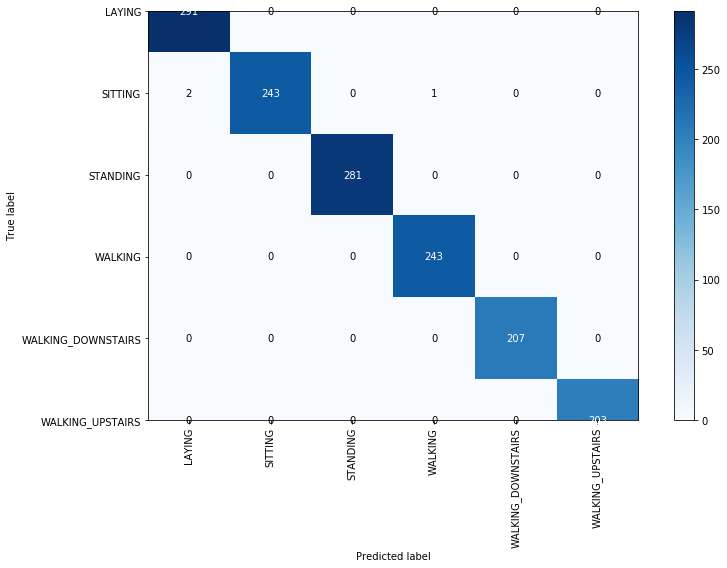

In [63]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
cm = confusion_matrix(y_test.values,y_pred_lr)
plot_confusion_matrix(cm, labels)  # plotting confusion matrix

# From above plot  we can see for 3 record prediction is not correct. 2 False Negative and 1 False Positive is predicted, We have accuracy of 99.80 percent which is very good.

# Plot ROC Curve for the final model [Marks:1]

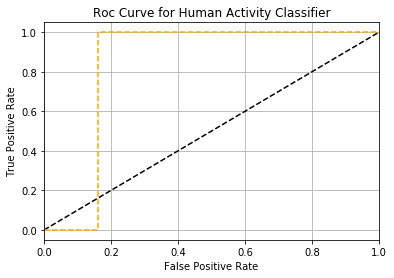

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr,pos_label=4)
#create ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr, linestyle='--',color='orange', label="")
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.0])
plt.title('Roc Curve for Human Activity Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROC',dpi=300)
plt.grid(True)
plt.show()


# Conclusion